In [1]:
%matplotlib inline
# Import Dependencies
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.style as style

# Read the CSV into a Pandas DataFrame
intake_csv = "Resources/Austin_Animal_Center_Intakes.csv"
outcome_csv= "Resources/Austin_Animal_Center_Outcomes.csv"

intake_df = pd.read_csv(intake_csv)
outcome_df = pd.read_csv(outcome_csv)

#convert date variable to datetime format

intake_df['DateTime'] = pd.to_datetime(intake_df['DateTime']).dt.date
outcome_df['DateTime'] = pd.to_datetime(outcome_df['DateTime']).dt.date

#update intake file with column reflecting number of intakes
#and select outcomes for animals with 1 or 2 intakes
intake_counts=intake_df.groupby(['Animal ID']).size().reset_index(name='counts')
intake_df=pd.merge(intake_df, intake_counts, on="Animal ID", how="outer")
reduced_intake_df=intake_df.query('counts <3')

#update outtake file with column reflecting number of intakes per animal
#and select outcomes for animals with 1 or 2 intakes
outcome_df=pd.merge(outcome_df, intake_counts, on="Animal ID", how="left")
reduced_outcome_df=outcome_df.query('counts <3')
#reduced_outcome_df=reduced_outcome_df.drop(columns=['counts'])

In [2]:
outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13,07/13/2015 01:50:00 PM,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07,07/07/2014 02:04:00 PM,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19,10/19/2015 02:55:00 PM,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [3]:
reduced_outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13,07/13/2015 01:50:00 PM,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07,07/07/2014 02:04:00 PM,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19,10/19/2015 02:55:00 PM,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [4]:
#now take single intake animals and match with any available outcome
reduced_intake_only_one_df=reduced_intake_df.query('counts <2')
#reduced_intake_only_one_df=reduced_intake_only_one_df.add_prefix('IN_')
reduced_outcome_df=reduced_outcome_df.add_prefix("OUT_")

reduced_intake_only_one_df=reduced_intake_only_one_df.rename(index=str,columns={"IN_Animal ID": "Animal ID"})
reduced_outcome_df=reduced_outcome_df.rename(index=str,columns={"OUT_Animal ID": "Animal ID"})
one_intake_merged=pd.merge(reduced_intake_only_one_df, reduced_outcome_df, on="Animal ID", how="left")

In [5]:
one_intake_merged["num_of_intakes_for_ID"]=1

In [6]:
#now take two intake animals and figure out order of intakes and outcomes
reduced_intake_two_df=reduced_intake_df.query('counts !=1')


In [7]:
reduced_intake_two_first_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_intake_two_first_date_lookup_df = reduced_intake_two_first_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_first_date_lookup_df["stay_number"]=1
reduced_intake_two_first_date_lookup_df.columns = reduced_intake_two_first_date_lookup_df.columns.droplevel(1)


reduced_intake_two_first_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2014-07-03,1
1,A282897,2013-11-21,1
2,A287017,2014-12-12,1
3,A304036,2015-06-06,1
4,A307010,2016-09-25,1


In [8]:
reduced_intake_two_second_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['max']).reset_index()
reduced_intake_two_second_date_lookup_df = reduced_intake_two_second_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_second_date_lookup_df["stay_number"]=2
reduced_intake_two_second_date_lookup_df.columns = reduced_intake_two_second_date_lookup_df.columns.droplevel(1)

In [9]:
reduced_intake_two_second_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2015-05-20,2
1,A282897,2015-07-06,2
2,A287017,2015-08-16,2
3,A304036,2016-04-19,2
4,A307010,2017-06-01,2


In [10]:
multiple_intakes_order_lookup = reduced_intake_two_first_date_lookup_df.append(reduced_intake_two_second_date_lookup_df)

In [11]:
#multiple_intakes_order_lookup

In [12]:
#reduced_intake_two_df

reduced_intake_two_df=pd.merge(reduced_intake_two_df, multiple_intakes_order_lookup, on=["Animal ID","DateTime"], how="left")
#reduced_intake_two_df

In [13]:
#look at outcome records for the two-intake group and determine order

In [14]:
#reduced_outcome_df

In [15]:
reduced_outcome_two_first_date_lookup_df=reduced_outcome_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_outcome_two_first_date_lookup_df = reduced_outcome_two_first_date_lookup_df[['Animal ID','OUT_DateTime']]
reduced_outcome_two_first_date_lookup_df["stay_number"]=1
reduced_outcome_two_first_date_lookup_df.columns = reduced_outcome_two_first_date_lookup_df.columns.droplevel(1)


reduced_outcome_two_first_date_lookup_df.head()

,Animal ID,OUT_DateTime,stay_number
0,A047759,2014-04-07,1
1,A134067,2013-11-16,1
2,A141142,2013-11-17,1
3,A163459,2014-11-14,1
4,A165752,2014-09-15,1


In [16]:
reduced_outcome_df=pd.merge(reduced_outcome_df, reduced_outcome_two_first_date_lookup_df, on=["Animal ID","OUT_DateTime"], how="left")

reduced_outcome_df

,Animal ID,OUT_Name,OUT_DateTime,OUT_MonthYear,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,stay_number
0,A741715,*Pebbles,2017-01-11,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0,1.0
1,A658751,Benji,2016-11-13,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0,NaN
2,A721285,NaN,2016-02-24,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0,1.0
3,A707443,NaN,2015-07-13,07/13/2015 01:50:00 PM,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0,1.0
4,A684346,NaN,2014-07-22,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0,1.0
5,A666430,Lucy,2013-11-07,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0,1.0
6,A675708,*Johnny,2014-06-03,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0,1.0
7,A680386,Monday,2014-06-15,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0,1.0
8,A683115,NaN,2014-07-07,07/07/2014 02:04:00 PM,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0,1.0
9,A713785,NaN,2015-10-19,10/19/2015 02:55:00 PM,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0,1.0


In [17]:
reduced_outcome_df['stay_number']=reduced_outcome_df['stay_number'].fillna(2)
#reduced_outcome_df

In [18]:
#reduced_intake_two_df=reduced_intake_two_df.add_prefix('IN_')
reduced_intake_two_df=reduced_intake_two_df.rename(index=str,columns={"IN_Animal ID": "Animal ID","IN_stay_number":"stay_number"})
reduced_intake_two_df

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,counts,stay_number
0,A683798,Mustachala,2016-07-21,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2,2
1,A683798,Mustachala,2014-07-15,07/15/2014 03:38:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,2,1
2,A663489,Precious,2014-12-17,12/17/2014 02:21:00 PM,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,1
3,A663489,Precious,2016-08-20,08/20/2016 05:22:00 PM,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,2
4,A741209,*Girly,2017-05-17,05/17/2017 11:26:00 AM,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,2
5,A741209,*Girly,2016-12-29,12/29/2016 01:32:00 PM,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,1
6,A761051,Bluebell,2018-06-28,06/28/2018 02:23:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,2
7,A761051,Bluebell,2017-10-28,10/28/2017 12:39:00 PM,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,1
8,A696008,Gunnar,2015-01-27,01/27/2015 02:35:00 PM,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2,1
9,A696008,Gunnar,2016-05-02,05/02/2016 03:15:00 PM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2,2


In [19]:
#merge the multiple intake with coressponsing outcomes - will not yield two outcomes for animals still in residence
two_intakes_merged=pd.merge(reduced_intake_two_df, reduced_outcome_df, on=["Animal ID", "stay_number"], how="left")
two_intakes_merged["num_of_intakes_for_ID"]="2"

In [20]:
two_intakes_merged

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,num_of_intakes_for_ID
0,A683798,Mustachala,2016-07-21,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,...,01/15/2013,Adoption,Foster,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2.0,2
1,A683798,Mustachala,2014-07-15,07/15/2014 03:38:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,...,01/15/2013,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Medium Hair Mix,White/Black,2.0,2
2,A663489,Precious,2014-12-17,12/17/2014 02:21:00 PM,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,...,03/19/2012,Return to Owner,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2.0,2
3,A663489,Precious,2016-08-20,08/20/2016 05:22:00 PM,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,...,03/19/2012,Return to Owner,NaN,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2.0,2
4,A741209,*Girly,2017-05-17,05/17/2017 11:26:00 AM,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,...,12/29/2015,Adoption,NaN,Dog,Spayed Female,1 year,Pit Bull Mix,White,2.0,2
5,A741209,*Girly,2016-12-29,12/29/2016 01:32:00 PM,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,...,12/29/2015,Return to Owner,NaN,Dog,Intact Female,1 year,Pit Bull Mix,White,2.0,2
6,A761051,Bluebell,2018-06-28,06/28/2018 02:23:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,...,10/28/2016,Adoption,NaN,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2.0,2
7,A761051,Bluebell,2017-10-28,10/28/2017 12:39:00 PM,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,...,10/28/2016,Adoption,NaN,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2.0,2
8,A696008,Gunnar,2015-01-27,01/27/2015 02:35:00 PM,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,...,11/12/2014,Adoption,NaN,Dog,Neutered Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2.0,2
9,A696008,Gunnar,2016-05-02,05/02/2016 03:15:00 PM,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,...,11/12/2014,Return to Owner,NaN,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2.0,2


In [21]:
one_intake_merged

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,num_of_intakes_for_ID
0,A748291,*Madison,2017-05-01,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,...,06/01/2016,Transfer,Partner,Dog,Spayed Female,1 year,Pit Bull Mix,Black,1.0,1
1,A750529,NaN,2017-05-28,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,...,12/21/2016,Transfer,Partner,Dog,Spayed Female,5 months,Miniature Schnauzer Mix,White/Cream,1.0,1
2,A730601,NaN,2016-07-07,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,...,12/07/2015,Transfer,SCRP,Cat,Neutered Male,7 months,Domestic Shorthair Mix,Blue Tabby,1.0,1
3,A748238,NaN,2017-05-01,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,...,05/01/2014,Transfer,Partner,Dog,Neutered Male,3 years,Bichon Frise Mix,White,1.0,1
4,A683644,*Zoey,2014-07-13,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,...,06/13/2014,Adoption,Foster,Dog,Spayed Female,4 months,Border Collie Mix,Brown/White,1.0,1
5,A676515,Rico,2014-04-11,04/11/2014 08:45:00 AM,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,...,01/11/2014,Return to Owner,NaN,Dog,Neutered Male,3 months,Pit Bull Mix,White/Brown,1.0,1
6,A679549,*Gilbert,2014-05-22,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,...,03/31/2014,Transfer,Partner,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black/White,1.0,1
7,A683656,NaN,2014-07-13,07/13/2014 01:20:00 PM,8238 Research Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,...,04/13/2014,Adoption,NaN,Cat,Neutered Male,3 months,Snowshoe Mix,Lynx Point,1.0,1
8,A709749,*Janeane,2015-08-12,08/12/2015 06:29:00 PM,4800 Weletka Dr in Austin (TX),Stray,Normal,Cat,Intact Female,1 year,...,08/12/2014,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Calico,1.0,1
9,A773634,Augie,2018-06-03,06/03/2018 03:26:00 PM,Braker And Ih35 in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,...,06/05/2008,Return to Owner,NaN,Dog,Intact Male,10 years,Dachshund Mix,Red,1.0,1


In [22]:
working_base_master=one_intake_merged.append(two_intakes_merged, ignore_index=True)

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [23]:
working_base_master.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_MonthYear,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,09/04/2017 12:00:00 AM,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,06/01/2017 04:42:00 PM,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,07/08/2016 09:00:00 AM,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,05/06/2017 03:57:00 PM,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,07/13/2014 11:02:00 AM,...,11/06/2014 10:06:00 AM,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN


In [24]:
working_base_master['time_to_exit'] = working_base_master['OUT_DateTime']-working_base_master['DateTime']

In [25]:
working_base_master['time_to_exit']=working_base_master['time_to_exit'] / np.timedelta64(1, 'D')

In [26]:
working_base_master['time_to_exit'].dtype

dtype('float64')

In [27]:
working_base_master.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,07/13/2014 11:02:00 AM,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,116.0


In [28]:
############################

In [29]:
#Discover maximum time_to_exit
working_base_master["time_to_exit"].max()

1102.0

In [30]:
#Remove all time_to_exit negative values
test_df = working_base_master[working_base_master['time_to_exit'].between(0, 2000)]
test_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,07/13/2014 11:02:00 AM,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,116.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,05/22/2014 03:43:00 PM,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,25.0
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,07/13/2014 01:20:00 PM,...,NaN,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4.0
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,08/12/2015 06:29:00 PM,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,41.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,06/03/2018 03:26:00 PM,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,2.0


In [31]:
#filter to only include Owner Surrender and Stray
test_df = test_df[test_df['Intake Type'].isin(["Owner Surrender", "Stray"])]
test_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,07/13/2014 11:02:00 AM,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,116.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,05/22/2014 03:43:00 PM,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,25.0
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,07/13/2014 01:20:00 PM,...,NaN,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4.0
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,08/12/2015 06:29:00 PM,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,41.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,06/03/2018 03:26:00 PM,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,2.0


In [32]:
#filter to only normal intake type
test_df = test_df.loc[test_df["Intake Condition"] == "Normal", :]

test_df.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0


In [33]:
#Create dataframe of named pets at outcome by dropping no names
name_df = test_df[test_df['OUT_Name'].notnull()]
name_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,05/22/2014 03:43:00 PM,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,25.0
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,08/12/2015 06:29:00 PM,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,41.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,06/03/2018 03:26:00 PM,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,2.0
10,5 months,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,11/15/2014 03:18:00 PM,...,George,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,6.0
11,1 month,A733551,Cat,Domestic Shorthair Mix,Brown Tabby/White,2016-08-23,183 And Cameron in Austin (TX),Normal,Stray,08/23/2016 02:35:00 PM,...,*Phillip,Partner,Transfer,Intact Male,1.0,Intact Male,1,1,NaN,9.0
13,2 months,A732960,Cat,Domestic Shorthair Mix,Calico,2016-08-15,6808 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,08/15/2016 03:08:00 PM,...,*Alexis,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
15,2 years,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,05/16/2017 11:29:00 AM,...,*Bongo,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,10.0
18,3 months,A711377,Dog,Anatol Shepherd Mix,Brown/Tan,2015-09-06,Los Arbolos Neighborhood in Austin (TX),Normal,Stray,09/06/2015 09:26:00 AM,...,Ruso,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,1.0


In [34]:
#Display value counts for dataframe
name_df["OUT_Outcome Type"].value_counts()

Adoption           25951
Transfer            9875
Return to Owner     9574
Euthanasia           704
Died                 173
Rto-Adopt            166
Missing               27
Disposal               2
Name: OUT_Outcome Type, dtype: int64

In [35]:
#Confirm NaN values removed
name_df["OUT_Name"].value_counts()

Bella           304
Max             279
Luna            228
Daisy           207
Charlie         187
Princess        186
Rocky           182
Lucy            172
Buddy           168
Coco            156
Blue            149
Lola            141
Sadie           116
Zeus            112
Shadow          112
Jack            106
Oreo            106
Lucky           106
Cookie          105
Toby             99
Duke             97
Chico            94
Lily             94
Molly            90
Mia              87
Milo             87
Bailey           86
Pepper           85
Bear             84
Chloe            83
               ... 
Gamble            1
Talisman          1
*Caper            1
Sir               1
*Soffi            1
Kayne             1
Raymond           1
*Snoop            1
Zilkie            1
*Uhland           1
Elf               1
Marky Mark        1
Randee            1
Delores           1
Jasco             1
Avalanche         1
Tejon             1
Taylor Daisy      1
*Bertie           1


In [36]:
#filter out outcome types besides adoption, transfer or Return to Owner
name_df = name_df[name_df['OUT_Outcome Type'].isin(["Adoption", "Return to Owner", "Transfer"])]
name_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,05/22/2014 03:43:00 PM,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,25.0
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,08/12/2015 06:29:00 PM,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,41.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,06/03/2018 03:26:00 PM,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,2.0
10,5 months,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,11/15/2014 03:18:00 PM,...,George,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,6.0
11,1 month,A733551,Cat,Domestic Shorthair Mix,Brown Tabby/White,2016-08-23,183 And Cameron in Austin (TX),Normal,Stray,08/23/2016 02:35:00 PM,...,*Phillip,Partner,Transfer,Intact Male,1.0,Intact Male,1,1,NaN,9.0
13,2 months,A732960,Cat,Domestic Shorthair Mix,Calico,2016-08-15,6808 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,08/15/2016 03:08:00 PM,...,*Alexis,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
15,2 years,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,05/16/2017 11:29:00 AM,...,*Bongo,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,10.0
18,3 months,A711377,Dog,Anatol Shepherd Mix,Brown/Tan,2015-09-06,Los Arbolos Neighborhood in Austin (TX),Normal,Stray,09/06/2015 09:26:00 AM,...,Ruso,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,1.0


In [37]:
#Confirm all outcome types removed besides adoption, transfer or Return to Owner
name_df["OUT_Outcome Type"].value_counts()

Adoption           25951
Transfer            9875
Return to Owner     9574
Name: OUT_Outcome Type, dtype: int64

In [38]:
#Fill outcome subtypes with NaN to None
name_df = name_df = name_df.fillna({'OUT_Outcome Subtype':'None'})

In [39]:
#See what adoption subtypes remain
name_df["OUT_Outcome Subtype"].value_counts()

None       31005
Partner     9648
Foster      4268
Offsite      252
SCRP         177
Snr           48
Barn           2
Name: OUT_Outcome Subtype, dtype: int64

In [40]:
#Filter data subtypes to remove foster, offsite and barn
name_df = name_df[name_df['OUT_Outcome Subtype'].isin(["None", "Partner", "SCRP", "Snr"])]
name_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,None,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,05/22/2014 03:43:00 PM,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,25.0
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,08/12/2015 06:29:00 PM,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,41.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,06/03/2018 03:26:00 PM,...,Augie,None,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,2.0
10,5 months,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,11/15/2014 03:18:00 PM,...,George,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,6.0
11,1 month,A733551,Cat,Domestic Shorthair Mix,Brown Tabby/White,2016-08-23,183 And Cameron in Austin (TX),Normal,Stray,08/23/2016 02:35:00 PM,...,*Phillip,Partner,Transfer,Intact Male,1.0,Intact Male,1,1,NaN,9.0
13,2 months,A732960,Cat,Domestic Shorthair Mix,Calico,2016-08-15,6808 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,08/15/2016 03:08:00 PM,...,*Alexis,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
15,2 years,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,05/16/2017 11:29:00 AM,...,*Bongo,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,10.0
18,3 months,A711377,Dog,Anatol Shepherd Mix,Brown/Tan,2015-09-06,Los Arbolos Neighborhood in Austin (TX),Normal,Stray,09/06/2015 09:26:00 AM,...,Ruso,None,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,1.0


In [41]:
#See what adoption subtypes remain
name_df["OUT_Outcome Subtype"].value_counts()

None       31005
Partner     9648
SCRP         177
Snr           48
Name: OUT_Outcome Subtype, dtype: int64

In [42]:
#See what adoption types remain
name_df["OUT_Outcome Type"].value_counts()

Adoption           21431
Transfer            9873
Return to Owner     9574
Name: OUT_Outcome Type, dtype: int64

In [43]:
#total outcome types (named)
name_all_count = name_df["OUT_Outcome Type"].count()
name_all_count

40878

In [44]:
name_adoption = (name_df.loc[name_df["OUT_Outcome Type"] == "Adoption", :])

In [45]:
#count of adopted (named)
name_adoption_count = name_adoption["OUT_Outcome Type"].count()
name_adoption_count

21431

In [46]:
name_transfer = (name_df.loc[name_df["OUT_Outcome Type"] == "Transfer", :])

In [47]:
#count of transfered (named)
name_transfer_count = name_transfer["OUT_Outcome Type"].count()
name_transfer_count

9873

In [48]:
name_return_to_owner = (name_df.loc[name_df["OUT_Outcome Type"] == "Return to Owner", :])

In [49]:
#count of returned to owner (named)
name_return_to_owner_count = name_return_to_owner["OUT_Outcome Type"].count()
name_return_to_owner_count

9574

In [50]:
#percentage adopted (named)
name_pct_adopted = name_adoption_count/name_all_count
name_pct_adopted

0.5242673320612554

In [51]:
#adopted per 100 animals (named)
name_per_capita_adopted = name_pct_adopted * 100
name_per_capita_adopted

52.42673320612554

In [52]:
#percentage transfered (named)
name_pct_transfer = name_transfer_count/name_all_count
name_pct_transfer

0.24152355790400704

In [53]:
#transfered per 100 animals (named)
name_per_capita_transfer = name_pct_transfer * 100
name_per_capita_transfer

24.152355790400705

In [54]:
#percentage returned to owner (named)
name_pct_return_to_owner = name_return_to_owner_count/name_all_count
name_pct_return_to_owner

0.23420911003473752

In [55]:
#returned to owner per 100 animals (named)
name_per_capita_return_to_owner = name_pct_return_to_owner * 100
name_per_capita_return_to_owner

23.42091100347375

In [56]:
############################

In [57]:
#display test df
test_df.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0


In [58]:
#fill NaN values in OUT_Name with None
no_name_df = test_df.fillna({'OUT_Name':'None'})

In [59]:
#Create dataframe of unnamed pets at outcome by filtering to just none
no_name_df = no_name_df.loc[no_name_df["OUT_Name"] == "None", :]

no_name_df.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,None,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,None,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,None,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,07/13/2014 01:20:00 PM,...,None,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4.0
12,1 month,A756485,Cat,Domestic Shorthair Mix,Blue Tabby,2017-08-20,1020 Grove Blvd in Austin (TX),Normal,Stray,08/20/2017 03:07:00 PM,...,None,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0


In [60]:
#display possible outcome types
no_name_df["OUT_Outcome Type"].value_counts()

Transfer           11657
Adoption            6188
Euthanasia           614
Return to Owner      340
Died                 210
Disposal              21
Missing                9
Relocate               6
Rto-Adopt              4
Name: OUT_Outcome Type, dtype: int64

In [61]:
#Confirm NaN values removed
no_name_df["OUT_Name"].value_counts()

None    19053
Name: OUT_Name, dtype: int64

In [62]:
#filter out outcome types besides adoption, transfer or return to owner
no_name_df = no_name_df[no_name_df['OUT_Outcome Type'].isin(["Adoption", "Return to Owner", "Transfer"])]
no_name_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,None,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,None,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,None,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,07/13/2014 01:20:00 PM,...,None,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4.0
12,1 month,A756485,Cat,Domestic Shorthair Mix,Blue Tabby,2017-08-20,1020 Grove Blvd in Austin (TX),Normal,Stray,08/20/2017 03:07:00 PM,...,None,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
16,1 year,A671219,Cat,Siamese Mix,Flame Point,2014-01-21,11602 Gunsmoke Circle in Austin (TX),Normal,Stray,01/21/2014 11:19:00 AM,...,None,SCRP,Transfer,Intact Male,1.0,Intact Male,1,1,NaN,0.0
19,2 years,A664571,Cat,Domestic Shorthair Mix,Torbie,2013-10-05,Austin (TX),Normal,Owner Surrender,10/05/2013 01:43:00 PM,...,None,NaN,Adoption,Spayed Female,1.0,Spayed Female,1,1,NaN,5.0
35,10 months,A737776,Dog,Yorkshire Terrier Mix,Black/Brown,2016-11-04,Patricia St And Pamela St in Austin (TX),Normal,Stray,11/04/2016 12:09:00 PM,...,None,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
36,3 weeks,A683041,Cat,Domestic Shorthair Mix,Black,2014-07-06,1128 Spur in Austin (TX),Normal,Stray,07/06/2014 12:37:00 PM,...,None,Partner,Transfer,Intact Female,1.0,Intact Female,1,1,NaN,0.0
42,1 week,A752501,Cat,Domestic Shorthair Mix,Brown Tabby,2017-06-23,1735 Rutland Dr in Austin (TX),Normal,Stray,06/23/2017 11:00:00 AM,...,None,Partner,Transfer,Intact Female,1.0,Intact Female,1,1,NaN,3.0


In [63]:
#Confirm all outcome types removed besides adoption, transfer or return to owner
no_name_df["OUT_Outcome Type"].value_counts()

Transfer           11657
Adoption            6188
Return to Owner      340
Name: OUT_Outcome Type, dtype: int64

In [64]:
#fill NaN values in OUT_Outcome Subtype with None
no_name_df = no_name_df = no_name_df.fillna({'OUT_Outcome Subtype':'None'})

In [65]:
#See what adoption subtypes remain
no_name_df["OUT_Outcome Subtype"].value_counts()

Partner    7776
None       5638
SCRP       2880
Snr        1001
Foster      848
Offsite      42
Name: OUT_Outcome Subtype, dtype: int64

In [66]:
#Filter data subtypes to remove foster, offsite and barn
no_name_df = no_name_df[no_name_df['OUT_Outcome Subtype'].isin(["None", "Partner", "SCRP", "Snr"])]
no_name_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,None,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,None,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,None,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,07/13/2014 01:20:00 PM,...,None,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4.0
12,1 month,A756485,Cat,Domestic Shorthair Mix,Blue Tabby,2017-08-20,1020 Grove Blvd in Austin (TX),Normal,Stray,08/20/2017 03:07:00 PM,...,None,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
16,1 year,A671219,Cat,Siamese Mix,Flame Point,2014-01-21,11602 Gunsmoke Circle in Austin (TX),Normal,Stray,01/21/2014 11:19:00 AM,...,None,SCRP,Transfer,Intact Male,1.0,Intact Male,1,1,NaN,0.0
19,2 years,A664571,Cat,Domestic Shorthair Mix,Torbie,2013-10-05,Austin (TX),Normal,Owner Surrender,10/05/2013 01:43:00 PM,...,None,None,Adoption,Spayed Female,1.0,Spayed Female,1,1,NaN,5.0
35,10 months,A737776,Dog,Yorkshire Terrier Mix,Black/Brown,2016-11-04,Patricia St And Pamela St in Austin (TX),Normal,Stray,11/04/2016 12:09:00 PM,...,None,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
36,3 weeks,A683041,Cat,Domestic Shorthair Mix,Black,2014-07-06,1128 Spur in Austin (TX),Normal,Stray,07/06/2014 12:37:00 PM,...,None,Partner,Transfer,Intact Female,1.0,Intact Female,1,1,NaN,0.0
42,1 week,A752501,Cat,Domestic Shorthair Mix,Brown Tabby,2017-06-23,1735 Rutland Dr in Austin (TX),Normal,Stray,06/23/2017 11:00:00 AM,...,None,Partner,Transfer,Intact Female,1.0,Intact Female,1,1,NaN,3.0


In [67]:
#display outcome subtypes
no_name_df["OUT_Outcome Subtype"].value_counts()

Partner    7776
None       5638
SCRP       2880
Snr        1001
Name: OUT_Outcome Subtype, dtype: int64

In [68]:
#display outcome types
no_name_df["OUT_Outcome Type"].value_counts()

Transfer           11657
Adoption            5298
Return to Owner      340
Name: OUT_Outcome Type, dtype: int64

In [69]:
#obtain the count of all outcome types (unnamed)
no_name_all_count = no_name_df["OUT_Outcome Type"].count()
no_name_all_count

17295

In [70]:
no_name_adoption = (no_name_df.loc[no_name_df["OUT_Outcome Type"] == "Adoption", :])

In [71]:
#obtain the count of adoptions (unnamed)
no_name_adoption_count = no_name_adoption["OUT_Outcome Type"].count()
name_adoption_count

21431

In [72]:
no_name_transfer = (no_name_df.loc[no_name_df["OUT_Outcome Type"] == "Transfer", :])

In [73]:
#obtain the count of transfers (unnamed)
no_name_transfer_count = no_name_transfer["OUT_Outcome Type"].count()
no_name_transfer_count

11657

In [74]:
no_name_return_to_owner = (no_name_df.loc[no_name_df["OUT_Outcome Type"] == "Return to Owner", :])

In [75]:
#obtain the count of return to owner (unnamed)
no_name_return_to_owner_count = no_name_return_to_owner["OUT_Outcome Type"].count()
no_name_return_to_owner_count

340

In [76]:
#pecentage adopted (unnamed)
no_name_pct_adopted = no_name_adoption_count/no_name_all_count
no_name_pct_adopted

0.30633130962705984

In [77]:
#adopted per 100 animals (unnamed)
no_name_per_capita_adopted = no_name_pct_adopted * 100
no_name_per_capita_adopted

30.633130962705984

In [78]:
#pecentage transfered (unnamed)
no_name_pct_transfer = no_name_transfer_count/no_name_all_count
no_name_pct_transfer

0.6740098294304713

In [79]:
#transfered per 100 animals (unnamed)
no_name_per_capita_transfer = no_name_pct_transfer * 100
no_name_per_capita_transfer

67.40098294304713

In [80]:
#pecentage returned to owner (unnamed)
no_name_pct_return_to_owner = no_name_return_to_owner_count/no_name_all_count
no_name_pct_return_to_owner

0.019658860942468923

In [81]:
#returned to owner (unnamed)
no_name_per_capita_return_to_owner = no_name_pct_return_to_owner * 100
no_name_per_capita_return_to_owner

1.9658860942468923

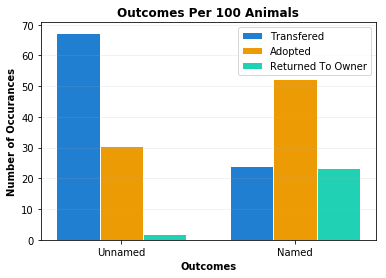

In [82]:
# set width of bar
barWidth = 0.25
 
# set height of bar
transfered_chart = [no_name_per_capita_transfer, name_per_capita_transfer]
adopted_chart = [no_name_per_capita_adopted, name_per_capita_adopted]
return_to_owner_chart = [no_name_per_capita_return_to_owner, name_per_capita_return_to_owner]
 
# Set position of bar on X axis
r1 = np.arange(len(transfered_chart))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, transfered_chart, color='#217fd1', width=barWidth, edgecolor='white', label='Transfered')
plt.bar(r2, adopted_chart, color='#ed9b04', width=barWidth, edgecolor='white', label='Adopted')
plt.bar(r3, return_to_owner_chart, color='#21d1b3', width=barWidth, edgecolor='white', label='Returned To Owner')


# Add xticks on the middle of the group bars
plt.xlabel('Outcomes', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(transfered_chart))], ['Unnamed', 'Named'])
plt.ylabel('Number of Occurances', fontweight='bold')
plt.title('Outcomes Per 100 Animals', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.grid(axis='y', alpha=.20)
plt.savefig("Outcomes Unnamed Vs. Named.png", dpi=1020)
plt.show()

In [83]:
######################################

In [84]:
#diplay working base master
working_base_master.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,07/13/2014 11:02:00 AM,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,116.0


In [85]:
#filter out all negative values for time to exit (only keep those from 0 day in shelter and beyond)
return_df = working_base_master[working_base_master['time_to_exit'].between(0, 2000)]
return_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,07/13/2014 11:02:00 AM,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,116.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,05/22/2014 03:43:00 PM,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,25.0
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,07/13/2014 01:20:00 PM,...,NaN,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4.0
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,08/12/2015 06:29:00 PM,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,41.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,06/03/2018 03:26:00 PM,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,2.0


In [86]:
#filter intake type to owner surrender and stray
return_df = return_df[return_df['Intake Type'].isin(["Owner Surrender", "Stray"])]
return_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,07/13/2014 11:02:00 AM,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,116.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,05/22/2014 03:43:00 PM,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,25.0
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,07/13/2014 01:20:00 PM,...,NaN,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4.0
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,08/12/2015 06:29:00 PM,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,41.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,06/03/2018 03:26:00 PM,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,2.0


In [87]:
#filter intake condition to normal
return_df = return_df.loc[return_df["Intake Condition"] == "Normal", :]
return_df.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,07/07/2016 12:11:00 PM,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0


In [88]:
#filter animal type to dog and create dog return df
dog_return_df = return_df.loc[return_df["Animal Type"] == "Dog", :]
dog_return_df.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,05/01/2017 02:26:00 PM,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,05/28/2017 01:22:00 PM,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,05/01/2017 10:53:00 AM,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,04/11/2014 08:45:00 AM,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,06/03/2018 03:26:00 PM,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,2.0


In [89]:
#filter dog return df by adoption
dog_return_df = dog_return_df[dog_return_df['OUT_Outcome Type'].isin(["Adoption"])]
dog_return_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
10,5 months,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,11/15/2014 03:18:00 PM,...,George,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,6.0
15,2 years,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,05/16/2017 11:29:00 AM,...,*Bongo,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,10.0
21,8 months,A763217,Dog,Labrador Retriever Mix,Black/Brown Brindle,2017-12-05,5002 Nuckols Crossing Road in Austin (TX),Normal,Stray,12/05/2017 01:51:00 PM,...,*Milton,NaN,Adoption,Neutered Male,1.0,Neutered Male,1,1,NaN,6.0
22,2 years,A715806,Dog,Boxer/Labrador Retriever,Black,2015-11-10,1506 Thorneridge Road in Austin (TX),Normal,Stray,11/10/2015 12:49:00 PM,...,*Samantha,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,43.0
26,9 months,A759224,Dog,Dachshund Mix,Blue/White,2017-09-29,View Point Drive And Nuckols Crossing in Austi...,Normal,Stray,09/29/2017 11:31:00 AM,...,Lola,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
32,9 months,A755135,Dog,Catahoula Mix,Chocolate/White,2017-07-29,Highway 183 in Austin (TX),Normal,Stray,07/29/2017 02:28:00 PM,...,*Minnie,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
34,7 years,A559625,Dog,Labrador Retriever Mix,Black/White,2017-07-13,Old Manchaca Rd & Drew Ln in Austin (TX),Normal,Stray,07/13/2017 03:18:00 PM,...,Rico,NaN,Adoption,Neutered Male,1.0,Neutered Male,1,1,NaN,0.0
35,10 months,A737776,Dog,Yorkshire Terrier Mix,Black/Brown,2016-11-04,Patricia St And Pamela St in Austin (TX),Normal,Stray,11/04/2016 12:09:00 PM,...,NaN,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
46,4 years,A689363,Dog,Bruss Griffon Mix,Tan,2014-10-02,Austin (TX),Normal,Owner Surrender,10/02/2014 05:18:00 PM,...,Kitty,NaN,Adoption,Spayed Female,1.0,Spayed Female,1,1,NaN,1.0
57,3 years,A666823,Dog,German Shepherd Mix,Sable,2013-11-07,7607 Glen Hill Cove in Austin (TX),Normal,Stray,11/07/2013 03:35:00 PM,...,*Sadie,NaN,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,6.0


In [90]:
#fill NaN outcome subtype to None
dog_return_df = dog_return_df.fillna({'OUT_Outcome Subtype':'None'})

In [91]:
#See what adoption subtypes remain
dog_return_df["OUT_Outcome Subtype"].value_counts()

None       17156
Foster      1812
Offsite      210
Name: OUT_Outcome Subtype, dtype: int64

In [92]:
#filter outcome subtype to just none
dog_return_df = dog_return_df[dog_return_df['OUT_Outcome Subtype'].isin(["None"])]
dog_return_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
10,5 months,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,11/15/2014 03:18:00 PM,...,George,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,6.0
15,2 years,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,05/16/2017 11:29:00 AM,...,*Bongo,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,10.0
21,8 months,A763217,Dog,Labrador Retriever Mix,Black/Brown Brindle,2017-12-05,5002 Nuckols Crossing Road in Austin (TX),Normal,Stray,12/05/2017 01:51:00 PM,...,*Milton,None,Adoption,Neutered Male,1.0,Neutered Male,1,1,NaN,6.0
22,2 years,A715806,Dog,Boxer/Labrador Retriever,Black,2015-11-10,1506 Thorneridge Road in Austin (TX),Normal,Stray,11/10/2015 12:49:00 PM,...,*Samantha,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,43.0
26,9 months,A759224,Dog,Dachshund Mix,Blue/White,2017-09-29,View Point Drive And Nuckols Crossing in Austi...,Normal,Stray,09/29/2017 11:31:00 AM,...,Lola,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
32,9 months,A755135,Dog,Catahoula Mix,Chocolate/White,2017-07-29,Highway 183 in Austin (TX),Normal,Stray,07/29/2017 02:28:00 PM,...,*Minnie,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
34,7 years,A559625,Dog,Labrador Retriever Mix,Black/White,2017-07-13,Old Manchaca Rd & Drew Ln in Austin (TX),Normal,Stray,07/13/2017 03:18:00 PM,...,Rico,None,Adoption,Neutered Male,1.0,Neutered Male,1,1,NaN,0.0
35,10 months,A737776,Dog,Yorkshire Terrier Mix,Black/Brown,2016-11-04,Patricia St And Pamela St in Austin (TX),Normal,Stray,11/04/2016 12:09:00 PM,...,NaN,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
46,4 years,A689363,Dog,Bruss Griffon Mix,Tan,2014-10-02,Austin (TX),Normal,Owner Surrender,10/02/2014 05:18:00 PM,...,Kitty,None,Adoption,Spayed Female,1.0,Spayed Female,1,1,NaN,1.0
57,3 years,A666823,Dog,German Shepherd Mix,Sable,2013-11-07,7607 Glen Hill Cove in Austin (TX),Normal,Stray,11/07/2013 03:35:00 PM,...,*Sadie,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,6.0


In [93]:
#create a dataframe that only looks at pit bull breeds
pit_bull_total_adopted = dog_return_df[dog_return_df["OUT_Breed"].str.contains('Pit')]
pit_bull_total_adopted

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
10,5 months,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,11/15/2014 03:18:00 PM,...,George,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,6.0
58,1 year,A745938,Dog,Pit Bull Mix,Brown,2017-03-26,Newcastle Dr And Susses Dr in Austin (TX),Normal,Stray,03/26/2017 04:17:00 PM,...,*Sully,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,63.0
216,2 years,A728842,Dog,Pit Bull Mix,Blue/White,2016-06-09,9515 Hotel Dr in Austin (TX),Normal,Stray,06/09/2016 12:52:00 PM,...,*James,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,30.0
259,3 months,A689986,Dog,Pit Bull Mix,White/Tan,2014-10-12,5808 Mckinney Falls Parkway in Austin (TX),Normal,Stray,10/12/2014 02:16:00 PM,...,*Phoebe,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,5.0
335,5 months,A673201,Dog,Pit Bull Mix,Brown Brindle/White,2014-02-20,300 E Rundberg in Austin (TX),Normal,Stray,02/20/2014 10:38:00 AM,...,Rusty,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,45.0
459,2 years,A742230,Dog,Pit Bull Mix,Black/White,2017-01-17,Wheless Ln & Coventry Ln in Austin (TX),Normal,Stray,01/17/2017 05:31:00 PM,...,*Brady,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,14.0
545,8 months,A672489,Dog,Pit Bull Mix,Brown Brindle,2014-02-13,Sahara And Mojave in Austin (TX),Normal,Stray,02/13/2014 06:41:00 PM,...,*Emmie,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,99.0
595,2 years,A757143,Dog,Pit Bull Mix,Black/White,2017-08-30,908 Cripple Creek in Austin (TX),Normal,Stray,08/30/2017 03:47:00 PM,...,*Hollywood,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,276.0
695,1 year,A664984,Dog,Pit Bull Mix,Blue,2013-10-12,7612 Marl in Austin (TX),Normal,Stray,10/12/2013 11:11:00 AM,...,Buddy,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,6.0
731,2 years,A753143,Dog,Pit Bull Mix,Blue/White,2017-07-02,Travis (TX),Normal,Stray,07/02/2017 12:49:00 PM,...,*Butch,None,Adoption,Neutered Male,1.0,Neutered Male,1,1,NaN,70.0


In [94]:
#create a dataframe that only looks at non-pit bull breeds
non_pit_bull_total_adopted = dog_return_df[dog_return_df["OUT_Breed"].str.contains('Pit') == False]
non_pit_bull_total_adopted

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
15,2 years,A749535,Dog,Border Collie Mix,Black/White,2017-05-16,6607 S Ih 35 Frontage Rd in Austin (TX),Normal,Stray,05/16/2017 11:29:00 AM,...,*Bongo,None,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,10.0
21,8 months,A763217,Dog,Labrador Retriever Mix,Black/Brown Brindle,2017-12-05,5002 Nuckols Crossing Road in Austin (TX),Normal,Stray,12/05/2017 01:51:00 PM,...,*Milton,None,Adoption,Neutered Male,1.0,Neutered Male,1,1,NaN,6.0
22,2 years,A715806,Dog,Boxer/Labrador Retriever,Black,2015-11-10,1506 Thorneridge Road in Austin (TX),Normal,Stray,11/10/2015 12:49:00 PM,...,*Samantha,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,43.0
26,9 months,A759224,Dog,Dachshund Mix,Blue/White,2017-09-29,View Point Drive And Nuckols Crossing in Austi...,Normal,Stray,09/29/2017 11:31:00 AM,...,Lola,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
32,9 months,A755135,Dog,Catahoula Mix,Chocolate/White,2017-07-29,Highway 183 in Austin (TX),Normal,Stray,07/29/2017 02:28:00 PM,...,*Minnie,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
34,7 years,A559625,Dog,Labrador Retriever Mix,Black/White,2017-07-13,Old Manchaca Rd & Drew Ln in Austin (TX),Normal,Stray,07/13/2017 03:18:00 PM,...,Rico,None,Adoption,Neutered Male,1.0,Neutered Male,1,1,NaN,0.0
35,10 months,A737776,Dog,Yorkshire Terrier Mix,Black/Brown,2016-11-04,Patricia St And Pamela St in Austin (TX),Normal,Stray,11/04/2016 12:09:00 PM,...,NaN,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,4.0
46,4 years,A689363,Dog,Bruss Griffon Mix,Tan,2014-10-02,Austin (TX),Normal,Owner Surrender,10/02/2014 05:18:00 PM,...,Kitty,None,Adoption,Spayed Female,1.0,Spayed Female,1,1,NaN,1.0
57,3 years,A666823,Dog,German Shepherd Mix,Sable,2013-11-07,7607 Glen Hill Cove in Austin (TX),Normal,Stray,11/07/2013 03:35:00 PM,...,*Sadie,None,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,6.0
59,1 year,A642379,Dog,Rottweiler Mix,Black/Red,2014-03-25,2202 Galway St in Austin (TX),Normal,Stray,03/25/2014 04:57:00 PM,...,Tj,None,Adoption,Neutered Male,1.0,Neutered Male,1,1,NaN,9.0


In [95]:
#create a dataframe that looks at all the return animals
all_return_df = dog_return_df[dog_return_df['stay_number'].isin(["1.0", "2.0"])]
all_return_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
72540,1 year,A741209,Dog,Pit Bull Mix,White,2017-05-17,21034 Cameron in Manor (TX),Normal,Stray,05/17/2017 11:26:00 AM,...,*Girly,None,Adoption,Spayed Female,2.0,Intact Female,2,2,2.0,11.0
72542,1 year,A761051,Dog,Soft Coated Wheaten Terrier Mix,Tan/White,2018-06-28,Austin (TX),Normal,Owner Surrender,06/28/2018 02:23:00 PM,...,Bluebell,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,2.0,5.0
72543,1 year,A761051,Dog,Soft Coated Wheaten Terrier Mix,Tan/White,2017-10-28,3118 Windsor Road in Austin (TX),Normal,Stray,10/28/2017 12:39:00 PM,...,Bluebell,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,1.0,4.0
72544,2 months,A696008,Dog,Australian Cattle Dog/German Shepherd,Sable,2015-01-27,120 Webberwood Way in Travis (TX),Normal,Stray,01/27/2015 02:35:00 PM,...,Gunnar,None,Adoption,Neutered Male,2.0,Intact Male,2,2,1.0,4.0
72552,7 years,A736590,Dog,Jack Russell Terrier Mix,White/Brown,2017-01-30,Austin (TX),Normal,Owner Surrender,01/30/2017 04:07:00 PM,...,Buddy,None,Adoption,Neutered Male,2.0,Neutered Male,2,2,2.0,3.0
72553,6 years,A736590,Dog,Jack Russell Terrier Mix,White/Brown,2016-10-13,11709 Garden Grove in Austin (TX),Normal,Stray,10/13/2016 02:15:00 PM,...,Buddy,None,Adoption,Neutered Male,2.0,Intact Male,2,2,1.0,23.0
72554,1 year,A750683,Dog,Chihuahua Shorthair Mix,White/Tan,2017-05-30,1815 Trinity St in Austin (TX),Normal,Stray,05/30/2017 01:17:00 PM,...,Lily,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,1.0,13.0
72556,1 year,A753451,Dog,Border Collie Mix,Black/White,2018-03-16,Austin (TX),Normal,Owner Surrender,03/16/2018 02:51:00 PM,...,Faith,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,2.0,1.0
72557,5 months,A753451,Dog,Border Collie Mix,Black/White,2017-07-06,1712 E Riverside Dr in Austin (TX),Normal,Owner Surrender,07/06/2017 02:47:00 PM,...,Faith,None,Adoption,Spayed Female,2.0,Intact Female,2,2,1.0,2.0
72558,4 years,A715704,Dog,Boxer/Beagle,White/Brown,2017-11-14,Austin (TX),Normal,Stray,11/14/2017 09:26:00 AM,...,*Happy,None,Adoption,Neutered Male,2.0,Neutered Male,2,2,2.0,8.0


In [96]:
#createdata frame filtering to just owner surrender
all_return_df = all_return_df[all_return_df['Intake Type'].isin(["Owner Surrender"])]
all_return_df

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
72542,1 year,A761051,Dog,Soft Coated Wheaten Terrier Mix,Tan/White,2018-06-28,Austin (TX),Normal,Owner Surrender,06/28/2018 02:23:00 PM,...,Bluebell,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,2.0,5.0
72552,7 years,A736590,Dog,Jack Russell Terrier Mix,White/Brown,2017-01-30,Austin (TX),Normal,Owner Surrender,01/30/2017 04:07:00 PM,...,Buddy,None,Adoption,Neutered Male,2.0,Neutered Male,2,2,2.0,3.0
72556,1 year,A753451,Dog,Border Collie Mix,Black/White,2018-03-16,Austin (TX),Normal,Owner Surrender,03/16/2018 02:51:00 PM,...,Faith,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,2.0,1.0
72557,5 months,A753451,Dog,Border Collie Mix,Black/White,2017-07-06,1712 E Riverside Dr in Austin (TX),Normal,Owner Surrender,07/06/2017 02:47:00 PM,...,Faith,None,Adoption,Spayed Female,2.0,Intact Female,2,2,1.0,2.0
72563,2 years,A681180,Dog,Jack Russell Terrier Mix,White/Brown,2016-05-06,Travis (TX),Normal,Owner Surrender,05/06/2016 11:20:00 AM,...,Zoey,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,2.0,4.0
72566,6 years,A736839,Dog,Boxer,Tan/White,2016-10-18,Austin (TX),Normal,Owner Surrender,10/18/2016 10:05:00 AM,...,Khali,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,1.0,29.0
72567,6 years,A736839,Dog,Boxer,Tan/White,2016-11-18,Outside Jurisdiction,Normal,Owner Surrender,11/18/2016 04:19:00 PM,...,Khali,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,2.0,36.0
72569,2 months,A735930,Dog,Labrador Retriever Mix,Black/White,2016-10-16,Austin (TX),Normal,Owner Surrender,10/16/2016 11:08:00 AM,...,Bella,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,2.0,0.0
72576,3 months,A767955,Dog,Pit Bull/Australian Cattle Dog,White/Tan,2018-03-22,Round Rock (TX),Normal,Owner Surrender,03/22/2018 06:23:00 PM,...,Ghost,None,Adoption,Neutered Male,2.0,Neutered Male,2,2,2.0,1.0
72578,7 months,A758894,Dog,Beagle/Whippet,Brown,2018-02-23,Outside Jurisdiction,Normal,Owner Surrender,02/23/2018 04:56:00 PM,...,Mouse,None,Adoption,Spayed Female,2.0,Spayed Female,2,2,2.0,17.0


In [97]:
#filter to create a list of animals that were returned that had "pit" in thier breed name
all_pit_bull_list = all_return_df[all_return_df['OUT_Breed'].str.contains('Pit')]

In [98]:
#filter to create a list of animals that were returned not a pit bull breed
all_non_pit_bull_list = all_return_df[all_return_df['OUT_Breed'].str.contains('Pit') == False]

In [99]:
#calculate the pit bull return percentage
all_pit_bull_return_pct = all_pit_bull_list['OUT_Breed'].count()/pit_bull_total_adopted['OUT_Breed'].count()
all_pit_bull_return_pct

0.11363636363636363

In [100]:
#calculate the pit bull return rate per 100 animals
all_pit_bull_return_per_capita = all_pit_bull_return_pct * 100
all_pit_bull_return_per_capita

11.363636363636363

In [101]:
#calculate the non pit bull return percentage
all_non_pit_bull_return_pct = all_non_pit_bull_list['OUT_Breed'].count()/non_pit_bull_total_adopted['OUT_Breed'].count()
all_non_pit_bull_return_pct

0.09548007488633324

In [102]:
#calculate the non pit bull return rate per 100 animals
all_non_pit_bull_return_per_capita = all_non_pit_bull_return_pct * 100
all_non_pit_bull_return_per_capita

9.548007488633324

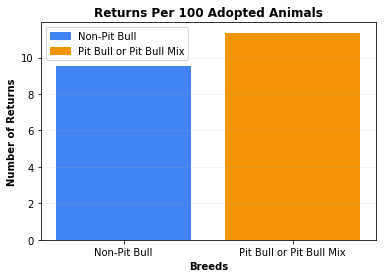

In [103]:
#create data frame
import matplotlib.patches as mpatches

breed = ["Non-Pit Bull", "Pit Bull or Pit Bull Mix"]
x_axis = [1,2]

non_pit_bull = [all_non_pit_bull_return_per_capita]
pit_bull = [all_pit_bull_return_per_capita]

plt.bar(1, non_pit_bull, color='#4283f4', align="center")
plt.bar(2, pit_bull, color="#f49404", align="center" )

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, breed)

plt.title("Returns Per 100 Adopted Animals", fontweight='bold')
plt.xlabel("Breeds", fontweight='bold')
plt.ylabel("Number of Returns", fontweight='bold')

# Defining the legends values
blue_patch = mpatches.Patch(color='#4283f4', label='Non-Pit Bull')
orange_patch = mpatches.Patch(color='#f49404', label='Pit Bull or Pit Bull Mix')

plt.legend(handles=[blue_patch, orange_patch])
plt.grid(axis='y', alpha=.20)
plt.savefig("Outcomes Pitbull vs. Non-Pitbull.png", dpi=1020)
plt.show()